In [161]:
import pandas as pd
import numpy as np
from pmdarima.arima import auto_arima
import matplotlib.pylab as plt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [180]:
#Importando dados csv e deletando dados sem importância para o experimento, organizando pelo index e transformando os dados de preço de string para inteiro para processamento do algorítimo e melhor visualização
gold_1_0=pd.read_csv("C:/users/Valdir Oliveira/Downloads/Ouro Futuros Dados Históricos.csv")
gold_1_0
del gold_1_0["Var%"]
del gold_1_0['Vol.']
del gold_1_0 ["Mínima"]
del gold_1_0['Máxima']
del gold_1_0['Abertura']

gold_1_0=gold_1_0.sort_index(ascending=False)

gold_1_0["Último"]= gold_1_0["Último"].apply(lambda x: x.replace(",","."))
gold_1_0["Último"]= gold_1_0["Último"].apply(lambda x: x.replace(".",""))
gold_1_0["Último"]=gold_1_0["Último"].str[:-2]
gold_1_0["Último"]=gold_1_0["Último"].astype(int)
gold_1_0




,Data,Último
280,01.01.2000,286
279,01.02.2000,295
278,01.03.2000,281
277,01.04.2000,276
276,01.05.2000,274
...,...,...
4,01.01.2023,1962
3,01.02.2023,1853
2,01.03.2023,1969
1,01.04.2023,1999


In [181]:
#Colocando a coluna data em formato correto e frequência de meses
gold_1_0['Data'] = pd.date_range(start=pd.to_datetime(gold_1_0['Data'], format="%d.%m.%Y").iloc[0], 
                                 periods=len(gold_1_0), freq='M')
gold_1_0

,Data,Último
280,2000-01-31,286
279,2000-02-29,295
278,2000-03-31,281
277,2000-04-30,276
276,2000-05-31,274
...,...,...
4,2023-01-31,1962
3,2023-02-28,1853
2,2023-03-31,1969
1,2023-04-30,1999


In [182]:
#Colocando o index em formato de data e retirando a coluna de data para processamento do algorítimo
gold_1_0=gold_1_0.rename(index=gold_1_0['Data'])
gold_1_0
gold_1_0=gold_1_0.iloc[:,1]
gold_1_0

2000-01-31     286
2000-02-29     295
2000-03-31     281
2000-04-30     276
2000-05-31     274
              ... 
2023-01-31    1962
2023-02-28    1853
2023-03-31    1969
2023-04-30    1999
2023-05-31    2012
Name: Último, Length: 281, dtype: int32

In [183]:
#Colocando a frequência de meses
gold_1_0=gold_1_0.asfreq("M")
gold_1_0

2000-01-31     286
2000-02-29     295
2000-03-31     281
2000-04-30     276
2000-05-31     274
              ... 
2023-01-31    1962
2023-02-28    1853
2023-03-31    1969
2023-04-30    1999
2023-05-31    2012
Freq: M, Name: Último, Length: 281, dtype: int32

In [191]:
#Passando parâmetro para obter o melhor modelo fazendo todas combinações possíveis 
stepwise_model=auto_arima(gold_1_0, start_p=1, start_q=1, start_d=0, start_P=0, max_p=6, max_q=6,  trace=True, stepwise=False )

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=3055.751, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=3052.910, Time=0.51 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=3054.905, Time=0.51 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=3056.863, Time=0.94 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=3058.584, Time=0.87 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=3059.259, Time=1.07 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=3053.051, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=3054.905, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=3056.887, Time=0.63 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=3057.710, Time=0.74 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=3060.166, Time=0.57 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=3054.878, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=3056.870, Time=0.33 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=3058.867, Time=0.46 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=3057.113, Time=0.88 sec
 ARIMA(3,1

In [192]:
#Visualizando o melhor modelo
stepwise_model.aic

<bound method ARIMA.aic of ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)>

In [193]:
#Treinando o modelo
stepwise_model.fit(gold_1_0)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [194]:
#Fazendo projeção de 6 anos que da um total de 72 meses
previsão=stepwise_model.predict(n_periods=72)
previsão


2023-06-30    2016.610015
2023-07-31    2022.768719
2023-08-31    2028.927423
2023-09-30    2035.086127
2023-10-31    2041.244831
                 ...     
2029-01-31    2429.243173
2029-02-28    2435.401877
2029-03-31    2441.560580
2029-04-30    2447.719284
2029-05-31    2453.877988
Freq: M, Length: 72, dtype: float64

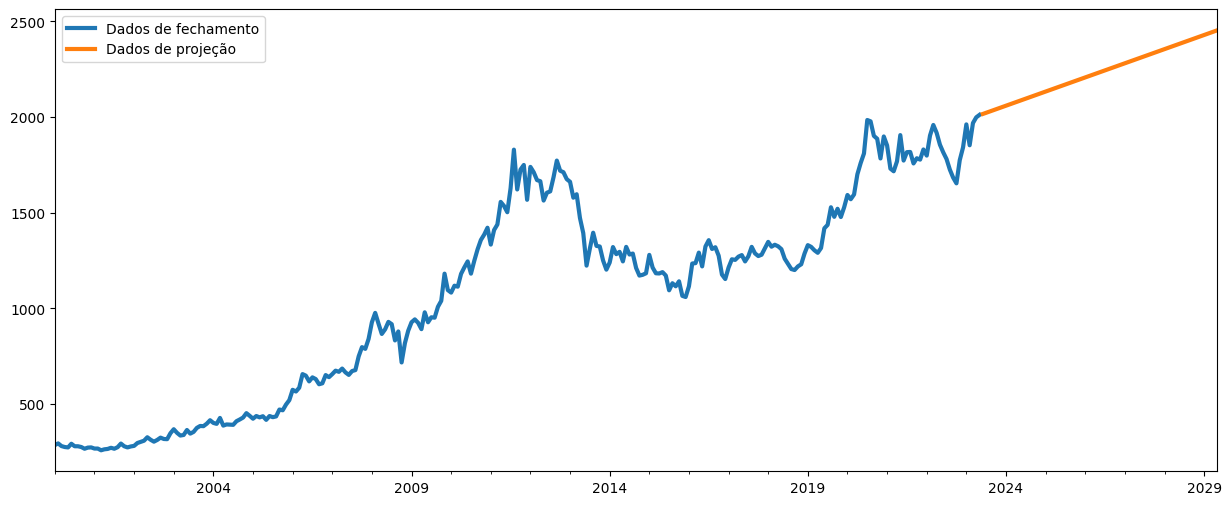

In [195]:
#Plotando o gráfico para a visualização visual da projeção
pd.concat([gold_1_0, previsão],axis=1).plot(label="Fechamento", linewidth=3)
plt.legend(["Dados de fechamento","Dados de projeção"])
